In [ ]:
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset


In [ ]:
# Load the data (replace with your data loading code)
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/transactions_train.csv')

# Convert 'date' to datetime format
data['date'] = pd.to_datetime(data['t_dat'])

# Extract useful features from date
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['day_of_week'] = data['date'].dt.dayofweek

# Select features and target variable
X = data[['year', 'month', 'day', 'day_of_week']].values
y = data['price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [ ]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Reshape target to a column vector

# Create a DataLoader to load data in mini-batches
batch_size = 1  # Adjust this based on memory
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


In [ ]:
class SalesPredictor(nn.Module):
    def __init__(self):
        super(SalesPredictor, self).__init__()
        self.fc1 = nn.Linear(4, 64)  # Input: 4 features (year, month, day, day_of_week)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  # Output: 1 target (price)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model, loss function, and optimizer
model = SalesPredictor()
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [ ]:
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    for X_batch, y_batch in train_loader:  # Iterate over mini-batches
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()  # Clear previous gradients
        loss.backward()  # Compute gradients
        optimizer.step()  # Update weights

    if (epoch+1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


KeyboardInterrupt: 

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

# Load data (replace with your data loading code)
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/transactions_train.csv')

# Randomly sample 1 million rows to reduce data size
data = data.sample(n=1000000)

# Convert 'date' to datetime format and extract useful features
data['date'] = pd.to_datetime(data['t_dat'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['day_of_week'] = data['date'].dt.dayofweek

# Select features and target variable
X = data[['year', 'month', 'day', 'day_of_week']].values
y = data['price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Reshape target to a column vector

# Create a DataLoader to load data in mini-batches
batch_size = 64  # Increase batch size for faster training
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define model
class SalesPredictor(nn.Module):
    def __init__(self):
        super(SalesPredictor, self).__init__()
        self.fc1 = nn.Linear(4, 32)  # Simplified model
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model, loss function, and optimizer
model = SalesPredictor()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Move data to the same device as the model
X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)

# Training loop
num_epochs = 200  # Reduce number of epochs initially
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    for X_batch, y_batch in train_loader:  # Iterate over mini-batches
        # Move batch data to device
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()  # Clear previous gradients
        loss.backward()  # Compute gradients
        optimizer.step()  # Update weights

    if (epoch+1) % 10 == 0:  # Save model every 10 epochs
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        torch.save(model.state_dict(), f'sales_model_epoch_{epoch+1}.ckpt')



Mounted at /content/drive
Epoch [10/200], Loss: 0.0010
Epoch [20/200], Loss: 0.0008
Epoch [30/200], Loss: 0.0008
Epoch [40/200], Loss: 0.0003
Epoch [50/200], Loss: 0.0003
Epoch [60/200], Loss: 0.0008
Epoch [70/200], Loss: 0.0004
Epoch [80/200], Loss: 0.0002
Epoch [90/200], Loss: 0.0003
Epoch [100/200], Loss: 0.0002
Epoch [110/200], Loss: 0.0005
Epoch [120/200], Loss: 0.0002
Epoch [130/200], Loss: 0.0005
Epoch [140/200], Loss: 0.0002
Epoch [150/200], Loss: 0.0003
Epoch [160/200], Loss: 0.0013
Epoch [170/200], Loss: 0.0002
Epoch [180/200], Loss: 0.0005
Epoch [190/200], Loss: 0.0004
Epoch [200/200], Loss: 0.0004


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate a date 30 days in the future
future_dates = pd.date_range(start='2022-10-04', periods=7, freq='D')

# Extract date-related features
future_data = pd.DataFrame()
future_data['date'] = future_dates
future_data['year'] = future_data['date'].dt.year
future_data['month'] = future_data['date'].dt.month
future_data['day'] = future_data['date'].dt.day
future_data['day_of_week'] = future_data['date'].dt.dayofweek


In [ ]:

# Normalize the new data using the previous normalizer
future_data_scaled = scaler.transform(future_data[['year', 'month', 'day', 'day_of_week']])


NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
future_data_tensor = torch.tensor(future_data_scaled, dtype=torch.float32)


In [ ]:
model.eval()  # Set the model to evaluation mode

# Disable gradient calculation and perform batch prediction
with torch.no_grad():
    future_predictions = model(future_data_tensor).numpy()


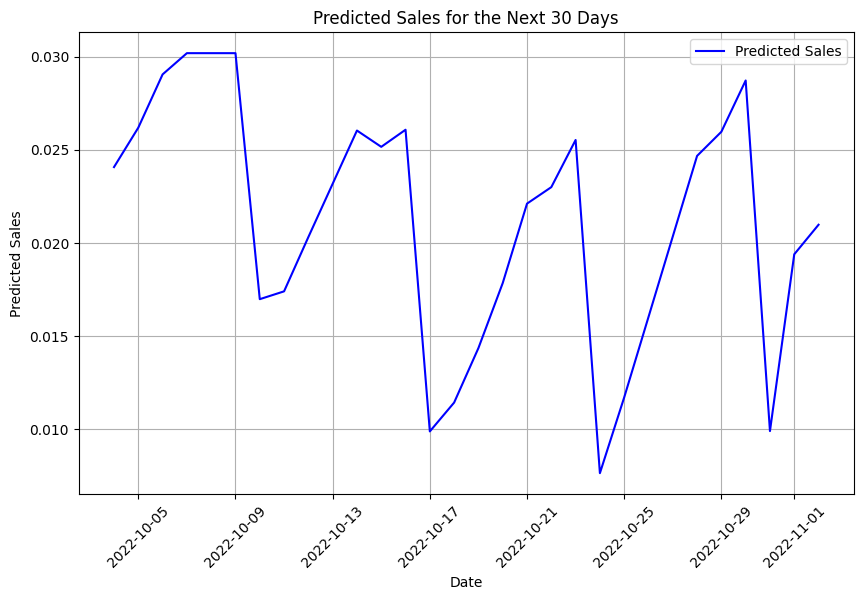

In [ ]:
# Visualize the forecast results for the next 30 days
plt.figure(figsize=(10, 6))
plt.plot(future_data['date'], future_predictions, label='Predicted Sales', color='blue')
plt.xlabel('Date')
plt.ylabel('Predicted Sales')
plt.title('Predicted Sales for the Next 30 Days')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()
